In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans

In [2]:
# List of ecDNA BED file paths
ecDNA_file_paths = ['ABC1_LUNG_amplicon1_ecDNA_1_intervals.bed', 'ABC1_LUNG_amplicon4_ecDNA_1_intervals.bed', 'CALU6_LUNG_amplicon1_ecDNA_1_intervals.bed', 
                       'CHAGOK1_LUNG_amplicon4_ecDNA_1_intervals.bed', 'COLO668_LUNG_amplicon1_ecDNA_1_intervals.bed', 'CORL23_LUNG_amplicon1_ecDNA_1_intervals.bed', 
                       'CORL23_LUNG_amplicon2_ecDNA_1_intervals.bed', 'CORL23_LUNG_amplicon4_ecDNA_1_intervals.bed', 'CORL279_LUNG_amplicon1_ecDNA_1_intervals.bed',
                       'CORL279_LUNG_amplicon2_ecDNA_1_intervals.bed', 'CORL311_LUNG_amplicon1_ecDNA_1_intervals.bed', 'CORL311_LUNG_amplicon1_ecDNA_2_intervals.bed', 
                       'CORL311_LUNG_amplicon3_ecDNA_1_intervals.bed', 'CORL88_LUNG_amplicon3_ecDNA_1_intervals.bed', 'DMS114_LUNG_amplicon3_ecDNA_1_intervals.bed',
                       'DMS114_LUNG_amplicon4_ecDNA_1_intervals.bed', 'DMS273_LUNG_amplicon1_ecDNA_1_intervals.bed', 'DMS273_LUNG_amplicon4_ecDNA_1_intervals.bed', 
                       'DMS273_LUNG_amplicon4_ecDNA_2_intervals.bed', 'DMS53_LUNG_amplicon12_ecDNA_1_intervals.bed', 'EBC1_LUNG_amplicon19_ecDNA_1_intervals.bed', 
                       'HARA_LUNG_amplicon10_ecDNA_1_intervals.bed', 'HARA_LUNG_amplicon2_ecDNA_1_intervals.bed', 'HARA_LUNG_amplicon2_ecDNA_2_intervals.bed', 
                       'HARA_LUNG_amplicon4_ecDNA_1_intervals.bed', 'HCC33_LUNG_amplicon1_ecDNA_1_intervals.bed', 'HCC827_LUNG_amplicon3_ecDNA_1_intervals.bed', 
                       'HCC827_LUNG_amplicon4_ecDNA_1_intervals.bed', 'HCC827_LUNG_amplicon4_ecDNA_2_intervals.bed', 'HCC827_LUNG_amplicon4_ecDNA_3_intervals.bed', 
                       'HCC95_LUNG_amplicon4_ecDNA_1_intervals.bed', 'HCC95_LUNG_amplicon4_ecDNA_2_intervals.bed', 'HCC95_LUNG_amplicon5_ecDNA_1_intervals.bed', 
                       'KNS62_LUNG_amplicon2_ecDNA_1_intervals.bed', 'LU99_LUNG_amplicon3_ecDNA_1_intervals.bed', 'NCIH1092_LUNG_amplicon2_ecDNA_1_intervals.bed', 
                       'NCIH1184_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH1355_LUNG_amplicon3_ecDNA_1_intervals.bed', 'NCIH1355_LUNG_amplicon4_ecDNA_1_intervals.bed', 
                       'NCIH1355_LUNG_amplicon5_ecDNA_1_intervals.bed', 'NCIH1435_LUNG_amplicon2_ecDNA_1_intervals.bed', 'NCIH1435_LUNG_amplicon3_ecDNA_1_intervals.bed',
                       'NCIH1435_LUNG_amplicon5_ecDNA_1_intervals.bed', 'NCIH1436_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH1436_LUNG_amplicon1_ecDNA_2_intervals.bed', 
                       'NCIH1437_LUNG_amplicon4_ecDNA_1_intervals.bed', 'NCIH146_LUNG_amplicon2_ecDNA_1_intervals.bed', 'NCIH157DM_LUNG_amplicon1_ecDNA_1_intervals.bed', 
                       'NCIH1651_LUNG_amplicon22_ecDNA_1_intervals.bed', 'NCIH1693_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH1693_LUNG_amplicon3_ecDNA_1_intervals.bed', 
                       'NCIH1693_LUNG_amplicon4_ecDNA_1_intervals.bed', 'NCIH1694_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH1694_LUNG_amplicon4_ecDNA_1_intervals.bed', 
                       'NCIH1703_LUNG_amplicon2_ecDNA_1_intervals.bed', 'NCIH1792_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH1792_LUNG_amplicon2_ecDNA_1_intervals.bed', 
                       'NCIH1792_LUNG_amplicon8_ecDNA_1_intervals.bed', 'NCIH1792_LUNG_amplicon9_ecDNA_1_intervals.bed', 'NCIH1793_LUNG_amplicon1_ecDNA_1_intervals.bed', 
                       'NCIH1836_LUNG_amplicon2_ecDNA_1_intervals.bed', 'NCIH1869_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH1876_LUNG_amplicon6_ecDNA_1_intervals.bed', 
                       'NCIH1963_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH1963_LUNG_amplicon2_ecDNA_1_intervals.bed', 'NCIH2029_LUNG_amplicon2_ecDNA_1_intervals.bed', 
                       'NCIH2029_LUNG_amplicon2_ecDNA_2_intervals.bed', 'NCIH2029_LUNG_amplicon2_ecDNA_3_intervals.bed', 'NCIH2030_LUNG_amplicon1_ecDNA_1_intervals.bed', 
                       'NCIH2066_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH2066_LUNG_amplicon2_ecDNA_1_intervals.bed', 'NCIH2066_LUNG_amplicon3_ecDNA_1_intervals.bed', 
                       'NCIH2066_LUNG_amplicon4_ecDNA_1_intervals.bed', 'NCIH2066_LUNG_amplicon4_ecDNA_2_intervals.bed', 'NCIH2066_LUNG_amplicon4_ecDNA_3_intervals.bed', 
                       'NCIH2066_LUNG_amplicon9_ecDNA_1_intervals.bed', 'NCIH2122_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH2170_LUNG_amplicon2_ecDNA_1_intervals.bed', 
                       'NCIH2170_LUNG_amplicon3_ecDNA_1_intervals.bed', 'NCIH2171_LUNG_amplicon2_ecDNA_1_intervals.bed', 'NCIH2171_LUNG_amplicon2_ecDNA_2_intervals.bed', 
                       'NCIH23_LUNG_amplicon10_ecDNA_1_intervals.bed', 'NCIH3255_LUNG_amplicon10_ecDNA_1_intervals.bed', 'NCIH3255_LUNG_amplicon5_ecDNA_1_intervals.bed', 
                       'NCIH3255_LUNG_amplicon7_ecDNA_1_intervals.bed', 'NCIH358_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH446_LUNG_amplicon1_ecDNA_1_intervals.bed', 
                       'NCIH460_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH510_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH510_LUNG_amplicon1_ecDNA_2_intervals.bed', 
                       'NCIH510_LUNG_amplicon1_ecDNA_3_intervals.bed', 'NCIH510_LUNG_amplicon3_ecDNA_1_intervals.bed', 'NCIH510_LUNG_amplicon3_ecDNA_2_intervals.bed', 
                       'NCIH510_LUNG_amplicon9_ecDNA_1_intervals.bed', 'NCIH520_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH520_LUNG_amplicon1_ecDNA_2_intervals.bed', 
                       'NCIH520_LUNG_amplicon5_ecDNA_1_intervals.bed', 'NCIH524_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH524_LUNG_amplicon2_ecDNA_1_intervals.bed', 
                       'NCIH526_LUNG_amplicon3_ecDNA_1_intervals.bed', 'NCIH596_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH650_LUNG_amplicon2_ecDNA_1_intervals.bed', 
                       'NCIH661_LUNG_amplicon8_ecDNA_1_intervals.bed', 'NCIH82_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH82_LUNG_amplicon1_ecDNA_2_intervals.bed', 
                       'NCIH889_LUNG_amplicon1_ecDNA_1_intervals.bed', 'NCIH889_LUNG_amplicon4_ecDNA_1_intervals.bed', 'SBC5_LUNG_amplicon2_ecDNA_1_intervals.bed', 
                       'SCLC21H_LUNG_amplicon1_ecDNA_1_intervals.bed', 'SCLC21H_LUNG_amplicon1_ecDNA_2_intervals.bed', 'SW900_LUNG_amplicon4_ecDNA_1_intervals.bed']

In [5]:
# Load all ecDNA BED files into DataFrames
ecDNA_dfs = []
for file_path in ecDNA_file_paths:
    df = pd.read_csv(file_path, sep='\t', header=None, names=['chr', 'start', 'end'])
    cell_line = os.path.basename(file_path).split('_')[0] # this is added to compare ecDNA intervals across different cell lines.
    df['cell_line'] = cell_line
    ecDNA_dfs.append(df)
    
# Combine all ecDNA DataFrames into one
combined_ecDNA_df = pd.concat(ecDNA_dfs, ignore_index=True)

In [6]:
# Chromosome sizes = max end position for each chromosome (end position of the intervals for each chromosome)
# This is to make sure that the regions fall within the size of the chromosome
chr_sizes = combined_ecDNA_df.groupby('chr')['end'].max().to_dict() #converts into a dictionary

In [16]:
# Calculate the median size of the observed regions
combined_ecDNA_df['size'] = combined_ecDNA_df['end'] - combined_ecDNA_df['start']
median_size = combined_ecDNA_df['size'].median()
#reduces the impact of outliers (more accurate interval size)

In [17]:
# Convert DataFrame to list of regions
# There are specific segments of the genome that contain ecDNA intervals
regions = combined_ecDNA_df[['chr', 'start', 'end', 'cell_line']].values.tolist()

This filter_by_proximity function below aims to: 
- Group Regions by Chromosome and Bin:
    - Group genomic regions based on their chromosome and their start and end positions, divided into bins of a specified size.
- Count the Number of Regions in Each Bin:
    - Count how many regions start or end in each bin, across all chromosomes.

In [18]:
def filter_by_proximity(regions, length_bin=1000): 
    # Calculate the maximum bin index
    # For each region in the list, calculate the bin index for the start and end positions 
    # by dividing these positions by the bin size
    max_bin_index = 0
    for region in regions:
        CHR, START, END, CELL_LINE = region
        max_bin_index = max(max_bin_index, START // length_bin, END // length_bin)

    max_bins = max_bin_index + 1  # Adjust to handle 0-based indexing
    #print(f"Max bin index: {max_bin_index}")
    chrs = dict()
    
    for region in regions:
        CHR, START, END, CELL_LINE = region
        start_bin = START // length_bin
        end_bin = END // length_bin
        #print({region} -> start_bin: {start_bin}, end_bin: {end_bin}")
        cur_regions = chrs.setdefault(CHR, [])
        cur_bins = chrs.setdefault(f"{CHR}_bins", [0] * max_bins)
        
        # Increment the bin counts for start and end positions
        cur_bins[start_bin] += 1 
        cur_bins[end_bin] += 1 
        # converts the region info into a tab-separated string and appends it to the list of regions for the current chromosome
        cur_regions.append('\t'.join(str(item) for item in region)) 
    
    # Remove the bins entry before returning
    for key in list(chrs.keys()):
        if key.endswith("_bins"):
            #print(f"{key}: {chrs[key][:100]}")  # Debugging output for the first 100 bins
            del chrs[key]
    
    # Flatten the bin counts into a single list
    bin_counts = [0] * max_bins
    for key in chrs.keys():
        bins_key = f"{key}_bins"
        if bins_key in chrs:
            for i in range(max_bins):
                bin_counts[i] += chrs[bins_key][i]

    return chrs, bin_counts

In [19]:
# Filter regions by proximity
chrs, bin_counts = filter_by_proximity(regions)

# Add a bin column to the combined DataFrame
combined_ecDNA_df['bin'] = combined_ecDNA_df['start'] // 1000

# Count the frequency of regions
frequency_dict = defaultdict(int)
for chr, regions in chrs.items():
    for region in regions:
        frequency_dict[region] += 1

# Turn frequency_dict to DataFrame
frequency_df = pd.DataFrame(list(frequency_dict.items()), columns=['region', 'count'])

In [20]:
# Parse regions into separate columns
frequency_df[['chr', 'start', 'end', 'cell_line']] = frequency_df['region'].str.split('\t', expand=True)
frequency_df['start'] = frequency_df['start'].astype(int)
frequency_df['end'] = frequency_df['end'].astype(int)
frequency_df['count'] = frequency_df['count'].astype(int)

# Add a bin column to the DataFrame
bin_size = 1000 
frequency_df['bin'] = frequency_df['start'] // bin_size

# Count the observed frequencies of regions in each bin
observed_frequencies = frequency_df.groupby(['chr', 'bin']).size().reset_index(name='observed_count')

The 'generate_random_regions' aims to: 
- create a baseline distribution for comparison with observed ecDNA intervals

In [21]:
# random regions to generate - same as observed regions
num_regions = len(frequency_df)

# generate random regions with fixed intervals
def generate_random_regions(chr_sizes, num_regions, interval_size):
    random_regions = []
    for chr, size in chr_sizes.items():
        for _ in range(num_regions // len(chr_sizes)):
            start = np.random.randint(0, size - interval_size)
            end = start + interval_size
            random_regions.append([chr, start, end])
    return random_regions

# Generate random regions
random_regions = generate_random_regions(chr_sizes, num_regions, median_size)

# Turn to DataFrame
random_regions_df = pd.DataFrame(random_regions, columns=['chr', 'start', 'end'])

# Add a bin column to the DataFrame
random_regions_df['bin'] = random_regions_df['start'] // bin_size

# Count the frequencies of random regions in each bin
random_frequencies = random_regions_df.groupby(['chr', 'bin']).size().reset_index(name='random_count')

In [31]:
# Merge observed and random frequencies
merged_frequencies = pd.merge(observed_frequencies, random_frequencies, on=['chr', 'bin'], how='outer').fillna(0)

# Add expected frequencies based on random distribution
total_observed = merged_frequencies['observed_count'].sum()
total_random = merged_frequencies['random_count'].sum()
merged_frequencies['expected_count'] = (merged_frequencies['random_count'] / total_random) * total_observed

#  we do chi-square test
chi2, p_value = chi2_contingency(
    [merged_frequencies['observed_count'].values, merged_frequencies['expected_count'].values]
)[:2]

print(f"Chi-square: {chi2}")
print(f"P-value: {p_value}")

# p-value significance
if p_value < 0.05:
    print("The observed distribution of regions is significantly different from the expected distribution.")
else:
    print("The observed distribution of regions is not significantly different from the expected distribution.")

# Calculate the over-representation
merged_frequencies['over_rep'] = merged_frequencies['observed_count'] > merged_frequencies['expected_count']

# Filter significant regions
significant_regions = merged_frequencies[merged_frequencies['over_rep']]

print(significant_regions)

Chi-square: 758.0000000000001
P-value: 0.40175084342591855
The observed distribution of regions is not significantly different from the expected distribution.
      chr     bin  observed_count  random_count  expected_count  over_rep
0    chr1     918             1.0           0.0             0.0      True
1    chr1     934             1.0           0.0             0.0      True
2    chr1    1160             1.0           0.0             0.0      True
3    chr1   31441             1.0           0.0             0.0      True
4    chr1   31775             1.0           0.0             0.0      True
..    ...     ...             ...           ...             ...       ...
367  chr8  143149             1.0           0.0             0.0      True
368  chr9   31666             1.0           0.0             0.0      True
369  chrX     349             1.0           0.0             0.0      True
370  chrX   99944             1.0           0.0             0.0      True
371  chrX  155803          

In [32]:
# Extract over-represented regions to visualize
over_rep_regions = significant_regions[['chr', 'bin']]

# Merge with original data to get full region info
over_rep_full = pd.merge(over_rep_regions, combined_ecDNA_df, on=['chr', 'bin'])

/var/folders/gp/qldjkqxs3z5_33tvpvnckz380000gn/T/ipykernel_32072/1166670318.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(over_rep_full['start'], label='Start Positions', shade=True)
/Users/fionnydarmawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/fionnydarmawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/gp/qldjkqxs3z5_33tvpvnckz380000gn/T/ipykernel_32072/1166670318.py:4: FutureWarning: 

`shade` is now deprecated in f

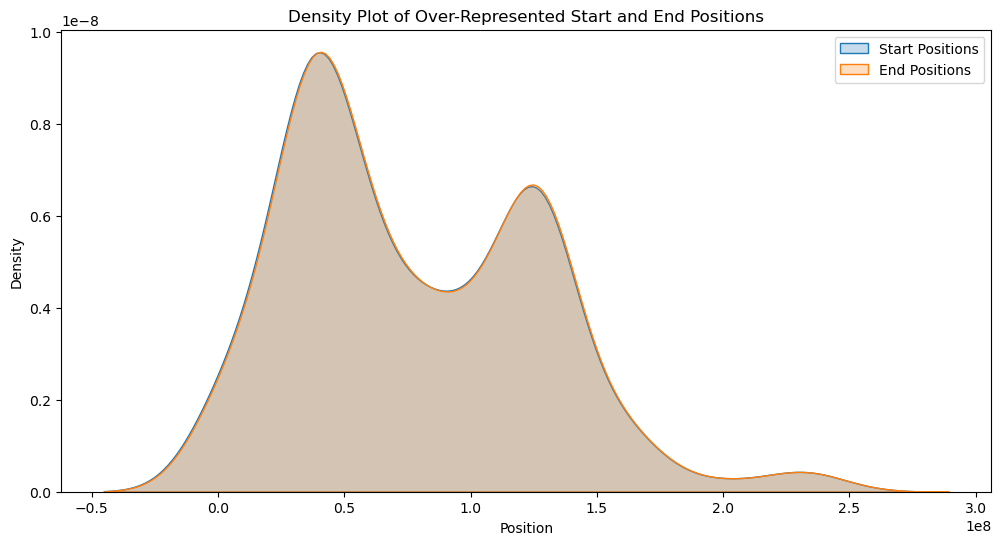

In [33]:
# Density Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(over_rep_full['start'], label='Start Positions', shade=True)
sns.kdeplot(over_rep_full['end'], label='End Positions', shade=True)
plt.xlabel('Position')
plt.ylabel('Density')
plt.title('Density Plot of Over-Represented Start and End Positions')
plt.legend()
plt.show()

- The plot above identifies genomic regions with high desities(frequencies) of ecDNA interval start and end positions, suggesting these regions might be significant or prone to ecDNA formation? 
- represents the distribution of start and end positions of over-represented ecDNA intervals across the genome. 
- X - axis: genomic positions of the ecDNA intervals in bp along the chromosome
- Y - axis: 'density' (frequency) of the start and end positions of the over-represented ecDNA intervals.
    - shows how concentrated the start and end positions are at different points along the genome. The higher the density, the more frequently intervals start or end at those positions.
    

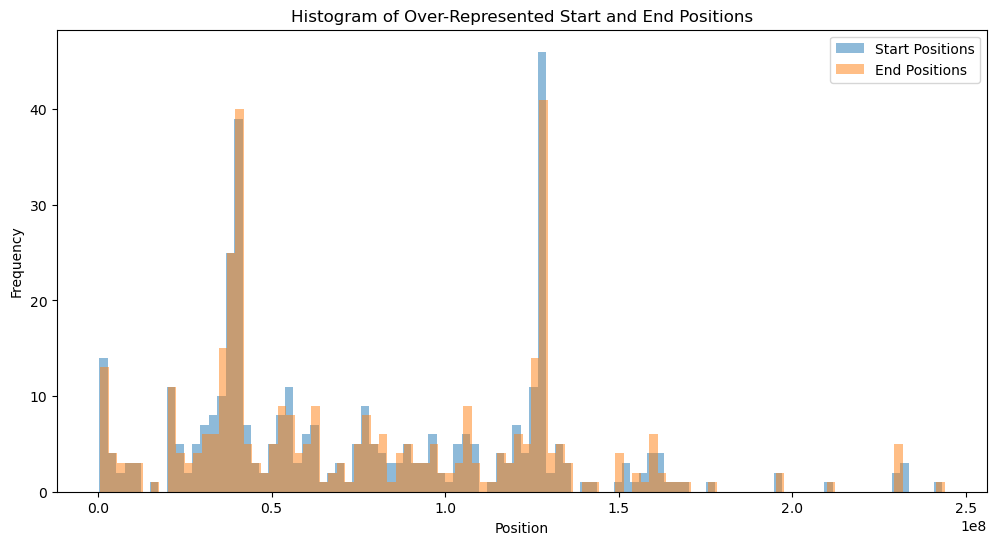

In [34]:
# Histogram
plt.figure(figsize=(12, 6))
plt.hist(over_rep_full['start'], bins=100, alpha=0.5, label='Start Positions')
plt.hist(over_rep_full['end'], bins=100, alpha=0.5, label='End Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Histogram of Over-Represented Start and End Positions')
plt.legend()
plt.show()

- By comparing the blue and orange bars, we can see if the start and end positions are concentrated in similar regions or if there are differences.
- If in some regions the blue and orange bars overlap, it means that the intervals often start and end in the same regions. This may suggest that ecDNA intervals are being generated and possibly re-integrated within close proximity
- If in some regions the blue and orange bars differ, it means that the frequencies of start and end positions differ. This may suggest that ecDNA is cut out from one part of the genome and integrates into another. 
- seems like most of them overlap...

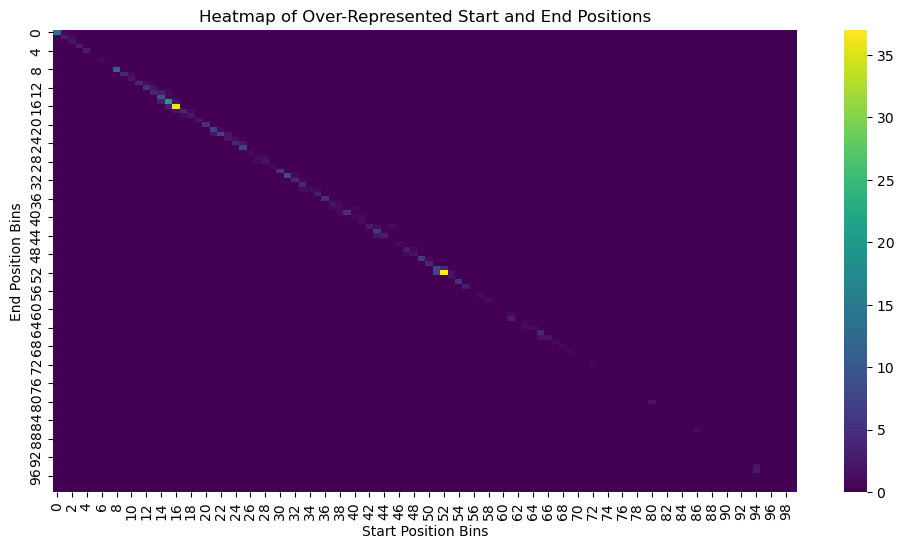

In [35]:
# Heatmap
heatmap_data = np.histogram2d(over_rep_full['start'], over_rep_full['end'], bins=(100, 100))[0]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('Start Position Bins')
plt.ylabel('End Position Bins')
plt.title('Heatmap of Over-Represented Start and End Positions')
plt.show()

- each element represents the count of intervals falling into the corresponding start and end position bins
- identify specific genomic bins with high densities of over-represented ecDNA interval start and end positions
- The diagonal pattern suggests that many intervals are short and localized.

/Users/fionnydarmawan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


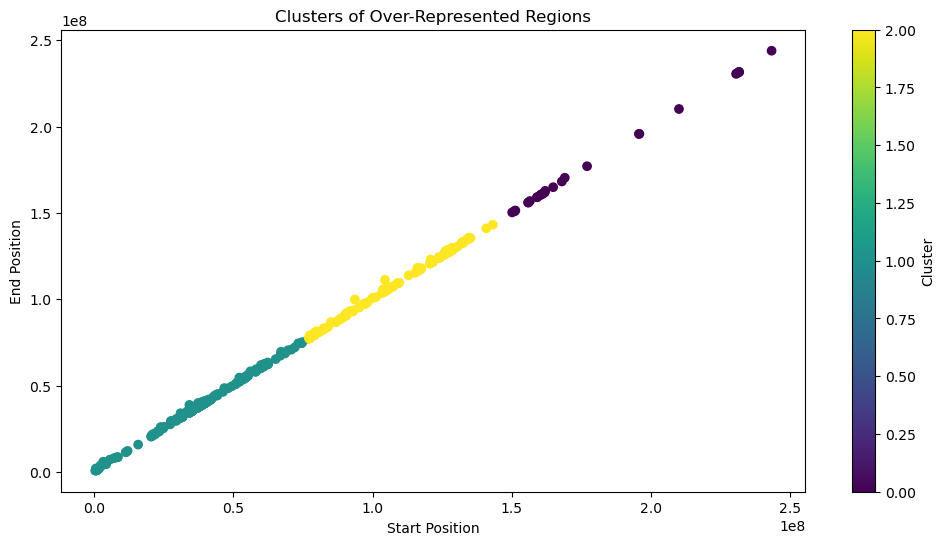

In [41]:
positions = over_rep_full[['start', 'end']].values

# We do K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(positions)
clusters = kmeans.labels_

# Add cluster labels to the DataFrame
over_rep_full['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 6))
plt.scatter(over_rep_full['start'], over_rep_full['end'], c=clusters, cmap='viridis')
plt.xlabel('Start Position')
plt.ylabel('End Position')
plt.title('Clusters of Over-Represented Regions')
plt.colorbar(label='Cluster')
plt.show()

- These clusters highlight specific genomic hotspots where ecDNA formation is more frequent.
- the diagonal alignment of clusters indicates that most intervals have closely aligned start and end positions. This suggests that many ecDNA intervals are relatively short
- Each color corresponds to a distinct group of over-represented ecDNA regions that share similarity in their start and end positions
- Teal cluster: This cluster has start and end position towards the lower end of the genomic range. This indicates a group of intervals that are relatively short and localized.
- Dark Purple: This cluster covers a mid-range of start and end positions. This indicates intervals that are more spread out.
- Yellow Cluster: This cluster is spread out over a higher range. This indicates intervals that might span larger distances.